# Modeling Data Using Machine Learning

In this exercise, we will take the point of view of a real estate agent who must estimate home prices. We will see how she can use machine learning techniques to come up with better estimates. 

This exercise has two parts.

1. Use multivariate linear regression to predict the best sale price for a house.
2. Use multivariate logistic regression to determine whether a seller should add a room to his home.

In this exercise, you will use the following elements. For more information about these elements, see the Python Documentation section at the end of the exercise.

* `np.ravel` method
* `np.mean` method

## Part 1: Use Multivariate Linear Regression to Determine a Price

Being able to accurately price listings is important for real estate agents. If they price too high, their client's home won't sell as fast. And if they price too low, they leave money on the table. 

A real estate agent can use linear regression to make her price listings more accurate.

Say a client wants to sell a home in Boston, which has the following variables:

    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per 10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     median value of owner-occupied homes in 1000's

This exercise shows how the agent can use past data to estimate the selling price for the home. The exercise has the following steps.

1. Create the model with training data.
2. Estimate the median selling price for the home.
3. Use regularization to correct overfitting in the model.
4. Use cross-validation to test the model for applicability.
5. Examine the regularization and cross-validation results.

### Step 1: Create the Model
Luckily for the client, the real estate agent has a set of data on Boston housing from 1978! She'll
create a model that she can then plug the client's data into and come up with an
estimate for the selling price.

The code below uses multivariate linear regression to plot expected and real median home values.

Run the cell to see the plot.

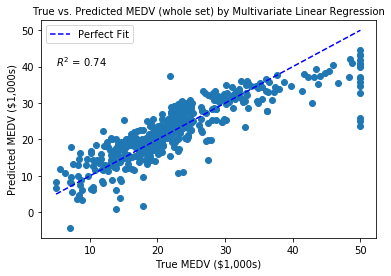

The model found for the whole dataset:
MEDV = 36.46 - 0.11*CRIM + 0.05*ZN + 0.02*INDUS + 2.69*CHAS - 17.77*NOX + 3.81*RM + 0.00*AGE - 1.48*DIS + 0.31*RAD - 0.01*TAX - 0.95*PTRATIO + 0.01*B - 0.52*LSTAT



In [2]:
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_regr(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict(X)
    plt.clf()
    plt.plot(y, y_pred, 'o')

    perfect_fit = np.linspace(y.min(),y.max(), 20)
    plt.plot(perfect_fit, perfect_fit, 'b--', label='Perfect Fit')

    
    plt.text(5, 40, "$R^2$ = %.2f" % regr.score(X,y))
    plt.title(title, size = size)
    plt.xlabel('True MEDV ($1,000s)')
    plt.ylabel('Predicted MEDV ($1,000s)')
    plt.legend()
    plt.show()

def write_equn(a, b, regr):

    regr.fit(a,b)

    equn = 'MEDV = %.2f' % regr.intercept_
    for feat, val in zip(data.feature_names, regr.coef_):
        if val > 0:
            equn += ' + %.2f*%s' % (val, feat)
        else:
            equn += ' - %.2f*%s' % (abs(val), feat)
    return equn

data = load_boston()
X = data.data
y = data.target
lin = linear_model.LinearRegression()

title = 'True vs. Predicted MEDV (whole set) by Multivariate Linear Regression'
plot_regr(X, y, lin, title)
equn_whole = write_equn(X,y, lin)
print("The model found for the whole dataset:\n{}\n".format(equn_whole))

### Step 2: Estimate the Median Value for the Home
The real estate agent now has a model with a lot of variables. All she has to do is enter the information for her client's home and she can estimate its price. She was able to gather some information on her client's home:

    - RM       5
    - DIS      2.5
    - TAX      700

We'll plug in the mean values for the values we don't have, which assumes the home is average for those features.

Run the two following cells to see an estimate for the home.

In [3]:
example = np.array([X.mean(axis=0)]).ravel()
example[5] = 5
example[7] = 2.5
example[9] = 700
example = example.reshape(1,-1)
example

array([[3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 5.00000000e+00, 6.85749012e+01, 2.50000000e+00,
        9.54940711e+00, 7.00000000e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]])

In [4]:
lin = linear_model.LinearRegression()
lin.fit(X,y)
y_pred = lin.predict(example)
print("She should price her client's home at $%5.2f, which is lower than the average price of $%5.2f" %
      (y_pred*1000, y.mean()*1000))

She should price her client's home at $15950.67, which is lower than the average price of $22532.81


### Step 3: Correct Overfitting
The agent used the model, using the actual value if she had it and the mean value otherwise, and the model returned the estimate you see above. This price will best balance selling her client's home in a timely manner and not leaving any money on the table.

Before she gets too confident about her prediction, however, she has to be aware of a couple of pitfalls: **overfitting** and **applicability of the model**. We'll look at overfitting first.

#### Overfitting

When the agent trains her model on this Boston housing dataset, the model is learning the characteristics of that data. Overfitting occurs when the model reflects the characteristics of the training data too well. In an extreme example, a model whose line passes through every available data point would be needlessly complex, and would not be able to accurately represent a home that is not part of the dataset. For example, if the dataset is made up of condominiums, the model won't do well predicting the price for a single-family home. 

The opposite of overfitting is **underfitting**. Underfitting creates a model that is too simple and does not reflect the characteristics of the training data.

The following image illustrates underfitting vs. overfitting:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7NQXhuJ5ZwFJnTv8CYnrYqfQOM4m0Q6fTE-mesM_AV3SbnnIl1g)

#### Regularization

The agent can use **regularization** to increase her confidence that her model isn't overfitting and that she can use it on a variety of homes. Regularization tends to push the value of the learned parameters lower, sometimes to zero, by deciding whether a feature (such as CRIM, RM, and others) is actually a good predictor. The result is a less complex model less prone to overfitting. 

The following image shows how regularization moves the overfit model toward something closer to "just right" by penalizing high values of $\theta_3$ and $\theta_4$.

![](http://www.holehouse.org/mlclass/07_Regularization_files/Image.png)

Run the cell below to see the results of regularization.

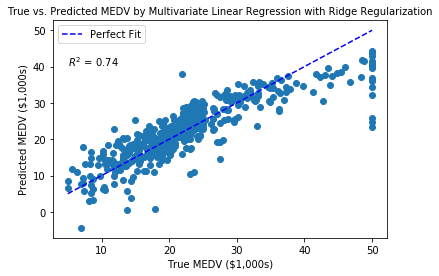

The model found by Ridge Regression:
MEDV = 31.60 - 0.10*CRIM + 0.05*ZN - 0.01*INDUS + 2.55*CHAS - 10.78*NOX + 3.85*RM - 0.01*AGE - 1.37*DIS + 0.29*RAD - 0.01*TAX - 0.88*PTRATIO + 0.01*B - 0.53*LSTAT



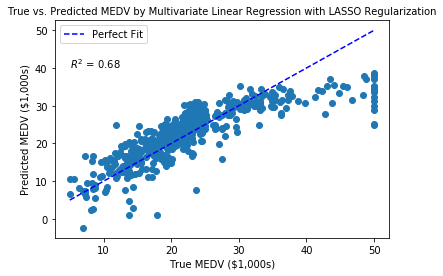

The model found by LASSO Regression:
MEDV = 41.06 - 0.06*CRIM + 0.05*ZN - 0.00*INDUS - 0.00*CHAS - 0.00*NOX + 0.95*RM + 0.02*AGE - 0.67*DIS + 0.26*RAD - 0.02*TAX - 0.72*PTRATIO + 0.01*B - 0.76*LSTAT



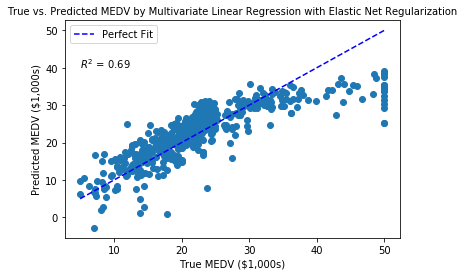

The model found by Elastic Net Regression:
MEDV = 42.23 - 0.08*CRIM + 0.05*ZN - 0.01*INDUS - 0.00*CHAS - 0.00*NOX + 0.93*RM + 0.02*AGE - 0.76*DIS + 0.30*RAD - 0.02*TAX - 0.75*PTRATIO + 0.01*B - 0.76*LSTAT



In [5]:

# Ridge regression
ridge = linear_model.Ridge(alpha=1.0)
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with Ridge Regularization'
plot_regr(X, y, ridge, title)
equn_ridge = write_equn(X,y, ridge)
print("The model found by Ridge Regression:\n{}\n".format(equn_ridge))

# LASSO regression
lasso = linear_model.Lasso(alpha=1.0)
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with LASSO Regularization'
plot_regr(X, y, lasso, title)
equn_lasso = write_equn(X,y, lasso)
print("The model found by LASSO Regression:\n{}\n".format(equn_lasso))

# Elastic-Net regression
el_net = linear_model.ElasticNet()
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with Elastic Net Regularization'
plot_regr(X, y, el_net, title)
equn_el_net = write_equn(X,y, el_net)
print("The model found by Elastic Net Regression:\n{}\n".format(equn_el_net))

### Step 4: Test the Model Applicability

The agent still needs to determine the applicability of her model. In other words, she has to answer the questions:

- Will this model actually work for my clients? 
- Can I use this to price a house on the north side of the city or the south? 

#### Cross-Validation

To answer these questions, the agent will use **cross-validation**, or a training data and test split. If the model works well on the test set, she can feel more confident that the model will work on new data.

The following image illustrates how she will implement cross-validation: 

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

Run the cell below to see the results for the train and test sets.

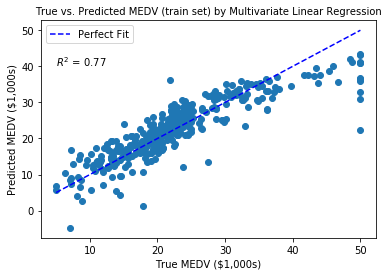

The model found for the train dataset:
MEDV = 36.93 - 0.12*CRIM + 0.04*ZN - 0.01*INDUS + 2.39*CHAS - 15.59*NOX + 3.77*RM - 0.01*AGE - 1.43*DIS + 0.24*RAD - 0.01*TAX - 0.99*PTRATIO + 0.01*B - 0.50*LSTAT



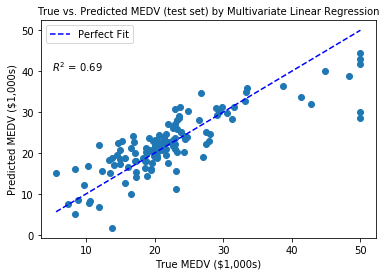

The model found for the test dataset:
MEDV = 23.92 - 0.08*CRIM + 0.04*ZN + 0.07*INDUS + 3.70*CHAS - 16.69*NOX + 4.52*RM + 0.01*AGE - 1.28*DIS + 0.45*RAD - 0.01*TAX - 0.81*PTRATIO + 0.02*B - 0.58*LSTAT



In [6]:
# Split data into train/test sets and show fit. 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

title = 'True vs. Predicted MEDV (train set) by Multivariate Linear Regression'
plot_regr(X_train, y_train, lin, title)
equn_train = write_equn(X_train, y_train, lin)
print("The model found for the train dataset:\n{}\n".format(equn_train))

title = 'True vs. Predicted MEDV (test set) by Multivariate Linear Regression'
plot_regr(X_test, y_test, lin, title)
equn_test = write_equn(X_test, y_test, lin)
print("The model found for the test dataset:\n{}\n".format(equn_test))

###  Examine the Regularization and Cross-Validation Results
As you can see above, the train set has a higher $R^2$ value compared to the test set—the $R^2$ value
is in [0,1], and it measures how well the model explains the dataset. This
happens because the model hasn't seen those data points yet. However, the
fit is good and it should help her to price her client's home.

To sum up, our real estate agent:

1. Used a model built from past data on Boston housing to give her client a good estimate of a sale price. 
2. Used **regularization** to reduce the chances her model had only learned the data from the dataset. 
3. Split up the data into training and test sets to **cross-validate** how well it did on new data.

Therefore, she can be confident in feeding her model new data from her clients that it was not originally trained on.

Next, we'll use use multivariate logistic regression with the same dataset to decide whether adding a bedroom to a house will pay off. 

## Part 2: Use Multivariate Logistic Regression for a Yes/No Question

We just saw how a real estate agent could make a model to accurately price her client's home to balance time on the market and not leave money on the table. 

Now, the agent has a client who wants to add a bedroom to his home, but he's wondering how it will affect the value and whether he will recoup his investment. More precisely, he wants to know the probability that his home will be worth more than the average home price in his neighborhood after the addition. He's in luck, because she has a multivariate logistic regression model she's been waiting to put to use!

As a reminder, her model has the following features:

    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per 10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     median value of owner-occupied homes in 1000's
    
The home owner gives the agent the following information on his house:

    - CRIM     8.5
    - RM       3
    - DIS      1.5
    - TAX      650

This exercise has the following steps.

1. Load the training data.
2. Use an ROC curve to classify the data.
3. Predict the probability that an additional room will add significant value to the sale price.
4. Use regularization to correct any overfitting in the model.
5. Use cross-validation to determine the model's applicability.
6. Examine the test results.

### Step 1: Load the Training Data
Using logistic regression, the real estate agent can give the home owner the probability that his house price, after the addition, will be greater than the mean house value for his region.

Run the cell below to load the necessary training data.

In [8]:
import numpy as np 
import scikitplot.plotters as skplt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_roc(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict_proba(X)
    skplt.plot_roc_curve(y, y_pred, title = title)
    plt.show()

def write_equn(a, b, regr):

    regr.fit(a,b)

    equn = 'MEDV = %.2f' % regr.intercept_
    for feat, val in zip(data.feature_names, regr.coef_.T):
        if val > 0:
            equn += ' + %.2f*%s' % (val, feat)
        else:
            equn += ' - %.2f*%s' % (abs(val), feat)
    return equn
def classify(y, threshold):
    y_clf = []
    for val in y:
        if val > threshold:
            y_clf.append(1)
        else:
            y_clf.append(0)

    return np.array(y_clf)

ModuleNotFoundError: No module named 'scikitplot'

### Step 2: Use an ROC Curve to Classify the Data

Next, we will fit our logistic regression model and see how well it classifies our data with a receiver operating characteristic (ROC) curve. ROC curves measure how well the model classifies data points. In our case, that corresponds to correctly labelling points with values (MEDV) greater than and less than the mean. 

To fit the model, run the cell below.

In [9]:
data = load_boston()
X = data.data
target_mean = classify(data.target, data.target.mean())

log = linear_model.LogisticRegression()

title = 'ROC Curve for Multivariate Logistic Regression (whole set)'
plot_roc(X, target_mean, log, title)
equn_whole = write_equn(X,target_mean, log)
print("The model found for the whole dataset:\n{}\n".format(equn_whole))

NameError: name 'classify' is not defined

An area of 1 is the maximum score possible, so .95 shows our model works well as a classifier.

### Step 3: Predict the Probability of Success
Your task is to predict the probability that the client's home will be worth more than average after he adds a room. You will need to:

1. Fill in the values for his home
2. Fill in the mean for all missing values
3. Add the vector as the variable to the call to `log.predict_proba()`

To do this, enter the values for the `example` array below, using the previous code as an example.

**Note**: To see the code that we used, see **Answer Code** below the code cell.

In [10]:

#--------------------------Enter your code here-------------#
example = np.array([X.mean(axis=0)]).ravel()
example[0] = 8.5
# 3+1 RMs after the addition
example[5] = 4
example[7] = 1.5
example[9] = 650
example = example.reshape(1,-1)

log.fit(X, target_mean)
print("P(MEDV > mean | RM=4; CRIM=0; DIS=1.5; TAX=650) = %.2f" % log.predict_proba(example)[0,1])
#------------------------------------------------------------#

NameError: name 'log' is not defined

#### Answer Code
We used the following code in the code cell.

```python
example = np.array([X.mean(axis=0)]).ravel()
example[0] = 8.5
# 3+1 RMs after the addition
example[5] = 4
example[7] = 1.5
example[9] = 650
example = example.reshape(1,-1)

log.fit(X, target_mean)
print("P(MEDV > mean | RM=4; CRIM=0; DIS=1.5; TAX=650) = %.2f" % log.predict_proba(example)[0,1])
```
Run the cell below to see the mean RMs.

In [ ]:
# mean number of RMs
X[:,5].mean(axis=0)

#### Results
Unfortunately, the probability of his house having a greater than average price if he adds a room is only 1%, and our model would predict the 0 class (instead of 1). Additionally, the mean number of rooms for homes in the client's area is 6.28, yet his home only has 4. So, even if he adds another room, the price of his home will be lower than average.

### Step 4: Correct for Overfitting

As with the linear regression case, the real estate agent has two concerns about her model: **overfitting** and **applicability** (she is not selling homes that were in the dataset it was trained on; still, can she use this model for clients?). 

Next, we'll introduce regularization to our model to address overfitting, with some graphs to see the effects.

Run the cell below to see the results.

In [11]:
# Ridge regression
ridge = linear_model.LogisticRegression(penalty='l2')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Ridge Regularization'
plot_roc(X, target_mean, ridge, title)
equn_ridge = write_equn(X,target_mean, ridge)
print("The model found by Ridge Regression:\n{}\n".format(equn_ridge))

# LASSO regression
lasso = linear_model.LogisticRegression(penalty='l1')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Lasso Regularization'
plot_roc(X, target_mean, lasso, title)
equn_lasso = write_equn(X,target_mean, lasso)
print("The model found by LASSO Regression:\n{}\n".format(equn_lasso))

# Elastic-Net regression
scaler = StandardScaler()
enet_data = X.copy()
scaler.fit(enet_data)
enet_data = scaler.transform(enet_data)
el_net = linear_model.SGDClassifier(loss='log', penalty='elasticnet')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Elastic Net Regularization'
plot_roc(enet_data, target_mean, el_net, title)
equn_el_net = write_equn(X,target_mean, el_net)
print("The model found by Elastic Net Regression:\n{}\n".format(equn_el_net))

NameError: name 'plot_roc' is not defined

#### Regularization Results
She sees she can use either Ridge or LASSO regularization with her model.
The area under the ROC curve for Ridge and LASSO are greater than 0.94. Elastic
Net has an area under the curve of 0.77. Either Ridge or LASSO are good 
candidates to combat overfitting without losing predictive ability. 
Unfortunately, there is some loss of predictive ability with Elastic Net 
regularization.  

### Step 5: Test Model Applicability
Next, the real estate agent will try a train/test split of the data. This will give her a chance 
to test her model on data it hasn't yet seen.

Run the cell below to see the results.

In [12]:
# split data into train/test sets and show fit 
X_train, X_test, y_train, y_test = train_test_split(X,target_mean, random_state=0)

title = 'ROC Curve for Multivariate Logistic Regression (train set)'
plot_roc(X_train, y_train, log, title)
equn_train = write_equn(X_train, y_train, log)
print("The model found for the train dataset:\n{}\n".format(equn_train))

title = 'ROC Curve for Multivariate Logistic Regression (test set)'
plot_roc(X_test, y_test, log , title)
equn_test = write_equn(X_test, y_test, log)
print("The model found for the test dataset:\n{}\n".format(equn_test))

NameError: name 'target_mean' is not defined

#### Cross-Validation Results
The area under ROC for the train set is 0.96 and 0.91 for the test set.
The model applied to the test data doesn't do as well as on the train data, as
she would expect. This happens because the model learned on the train set, and
it is seeing the test data for the first time. Because there was no big fall in
performance (area fell from .96 to .91) from train to test, she
can be confident in using her model with her clients.

### Step 6: Examine the Results

To sum up, a client came to the real estate agent interested to know 
whether adding a room to his home would pay off for him by increasing its value
above the mean for his neighborhood. This question has a yes or no answer, so
it is a classification problem-a perfect fit for a classification model like
logistic regression. 

Our real estate agent:

1. Used a model built from past data on Boston housing to determine the answer to a yes/no question. 
2. Used **regularization** to reduce the chances her model had only learned the data from the dataset. 
3. Split up the data into training and test sets to **cross-validate** how well it did on new data.

Using multivariate logistic regression, the agent determined that her client should not add a room to his home.

## Python Documentation
Run the following cell to access documentation for the `ravel` function.

In [13]:
?np.ravel

Run the following cell to access documentation for the `mean` function.

In [14]:
?np.mean